In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

%matplotlib inline

## Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [149]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [151]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


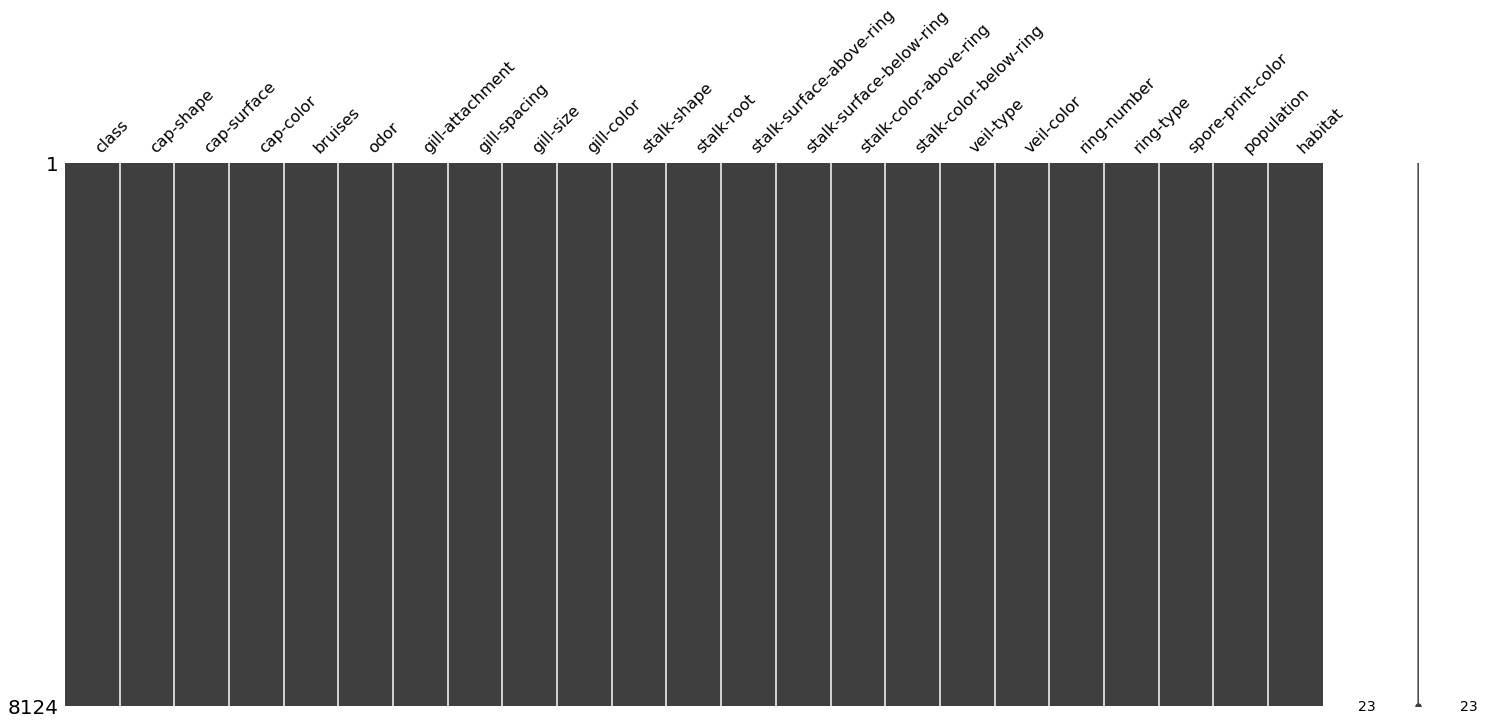

In [152]:
msno.matrix(df)
plt.show()

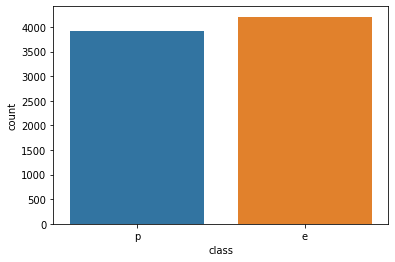

In [153]:
sns.countplot(x="class",data=df)
plt.show()

In [154]:
for i in df.columns:
    print(i, df[i].unique())
    print("----------------")

class ['p' 'e']
----------------
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
----------------
cap-surface ['s' 'y' 'f' 'g']
----------------
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
----------------
bruises ['t' 'f']
----------------
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
----------------
gill-attachment ['f' 'a']
----------------
gill-spacing ['c' 'w']
----------------
gill-size ['n' 'b']
----------------
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
----------------
stalk-shape ['e' 't']
----------------
stalk-root ['e' 'c' 'b' 'r' '?']
----------------
stalk-surface-above-ring ['s' 'f' 'k' 'y']
----------------
stalk-surface-below-ring ['s' 'f' 'y' 'k']
----------------
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
----------------
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
----------------
veil-type ['p']
----------------
veil-color ['w' 'n' 'o' 'y']
----------------
ring-number ['o' 't' 'n']
----------------
ring-type ['p' 'e'

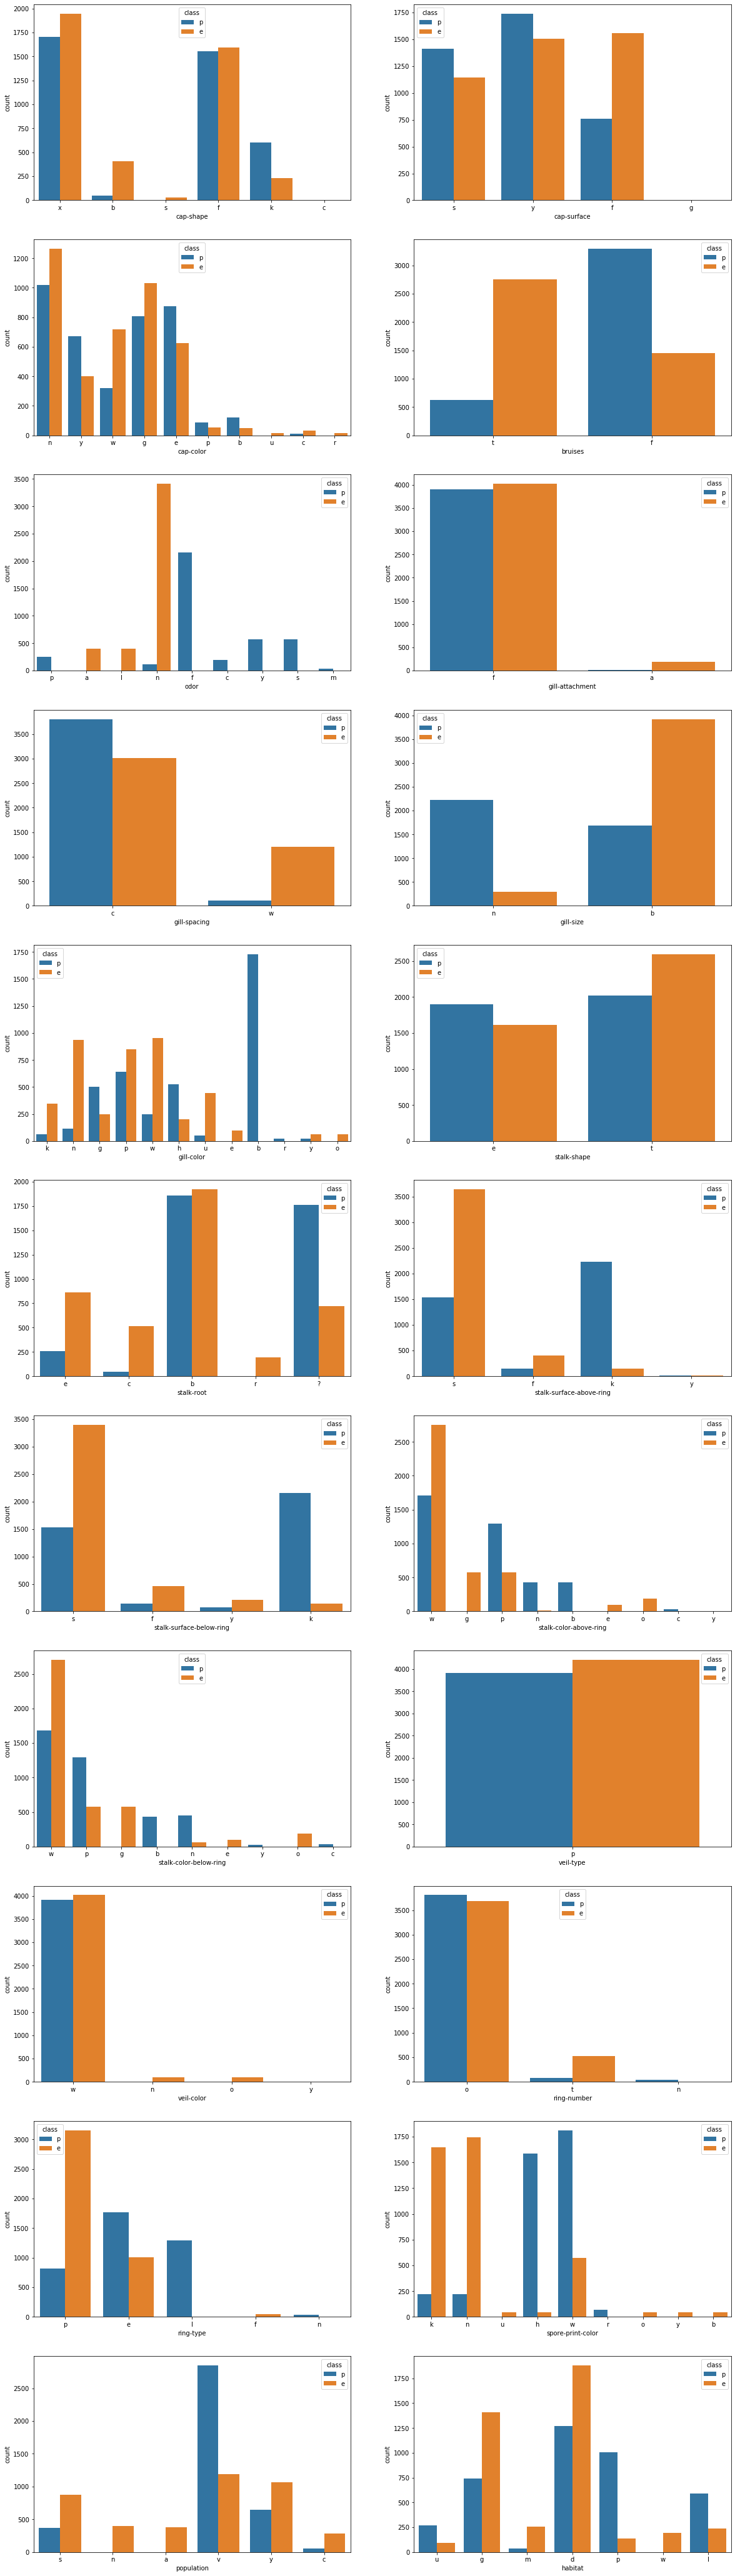

In [155]:
catog_feat = df.drop("class",axis=1).columns.tolist()
fig, axes = plt.subplots(11,2, figsize=(20,75))
for variable, subplot in zip(catog_feat, axes.flatten()):
    sns.countplot(x=variable, data=df, ax=subplot,hue="class")

In [156]:
used_data = ["odor", "bruises", "gill-spacing", "gill-size", "gill-color","stalk-shape", "stalk-surface-below-ring", "stalk-color-above-ring",
             "ring-type","spore-print-color", "population", "habitat"]

In [157]:
X = df[used_data]
X_dum = pd.get_dummies(X, drop_first=True)
X_dum

,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,bruises_t,gill-spacing_w,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [158]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [167]:
y =  df["class"].copy()
y = [1 if i == "p" else 0 for i in y]
y = pd.DataFrame(y)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state=42, stratify=y)
X_train.head()
y_train.head()

,0
325,0
68,0
5529,1
7021,1
3246,1


In [97]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

C:\Users\dogan\AppData\Local\Continuum\anaconda2\envs\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)

acc_score = accuracy_score(y_test, y_pred)
pre_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)

print("Accuracy: {}".format(acc_score))
print("Precision: {}".format(pre_score))
print("Recall: {}".format(rec_score))
print("F1 Score: {}".format(f1))
print("Auc Score: {}".format(auc))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Auc Score: 1.0


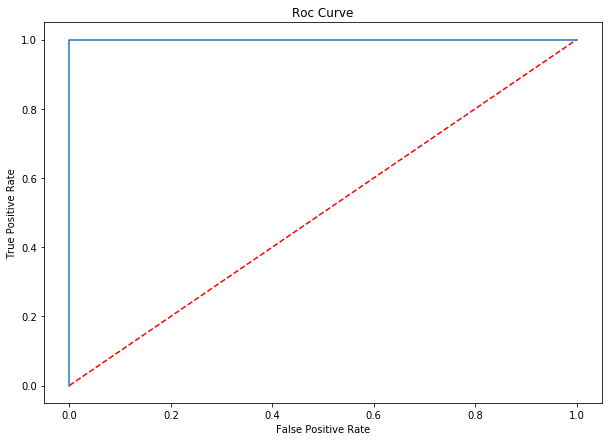

In [193]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

x_t = np.linspace(0,1,num=3)
y_t = np.linspace(0,1,num=3)

plt.figure(figsize=(10,7))
plt.plot(x_t, y_t, 'r--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")

plt.show()

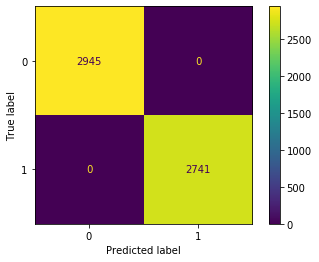

In [134]:
plot_confusion_matrix(rf, X_train,y_train, values_format="2d")
plt.show()

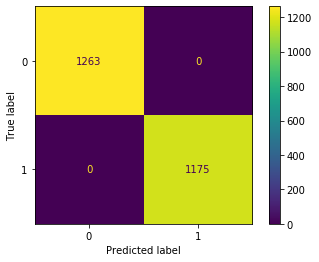

In [135]:
plot_confusion_matrix(rf, X_test,y_test, values_format="2d")
plt.show()

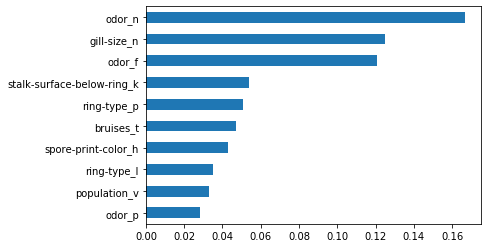

In [195]:
df_features = pd.Series(data=rf.feature_importances_, index=X_train.columns)
sorted_df_feat = df_features.sort_values(ascending=True).tail(10)
sorted_df_feat.plot(kind="barh")
plt.show()